In [1]:
from imutils import face_utils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import imutils
import argparse 
import imutils
import time
import dlib
import cv2
import os 

In [2]:
# load the face detector (HOG-SVM)
print("[INFO] loading dlib thermal face detector...")
detector = dlib.simple_object_detector("../../../Documents/thermal-project-data/dlib_models/dlib_face_detector.svm")

# load the facial landmarks predictor
print("[INFO] loading facial landmark predictor...")
predictor = dlib.shape_predictor("../../../Documents/thermal-project-data/dlib_models/dlib_landmark_predictor.dat")


[INFO] loading dlib thermal face detector...
[INFO] loading facial landmark predictor...


In [3]:
def get_length(filename):
    '''
    Input: Filename including path
    Returns: The total duration in seconds
    '''
    result = subprocess.run(["ffprobe", "-v", "error", "-show_entries",
                             "format=duration", "-of",
                             "default=noprint_wrappers=1:nokey=1", filename],
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT)
    return float(result.stdout)

In [4]:
# assume that we know the fps, this assumption is true for Flir Thermal camera (iOS model)
fps = 8.737238044062332

# This cell will find out the frame number corresponding to the timestamp of interest

# location fo the file
filenameWithPath = '../../../Documents/thermal-project-data/cycling/20221005T092646.MP4'

# helper to find frame number from the timestamp
print("Total Frames In The Video Feed Is = {}".format(fps*get_length(filenameWithPath)))

# timestamp of interest should be given below.
# the corresponding frame number will be returned
minutes = 0
seconds = 5
totalSeconds = (minutes*60)+(seconds)
frameElapsed = totalSeconds*fps
print("Frame of interst is {} rounded to {}".format(frameElapsed, round(frameElapsed)))

Total Frames In The Video Feed Is = 269.5146724449221
Frame of interst is 43.68619022031166 rounded to 44


Total number of frames = 271.0





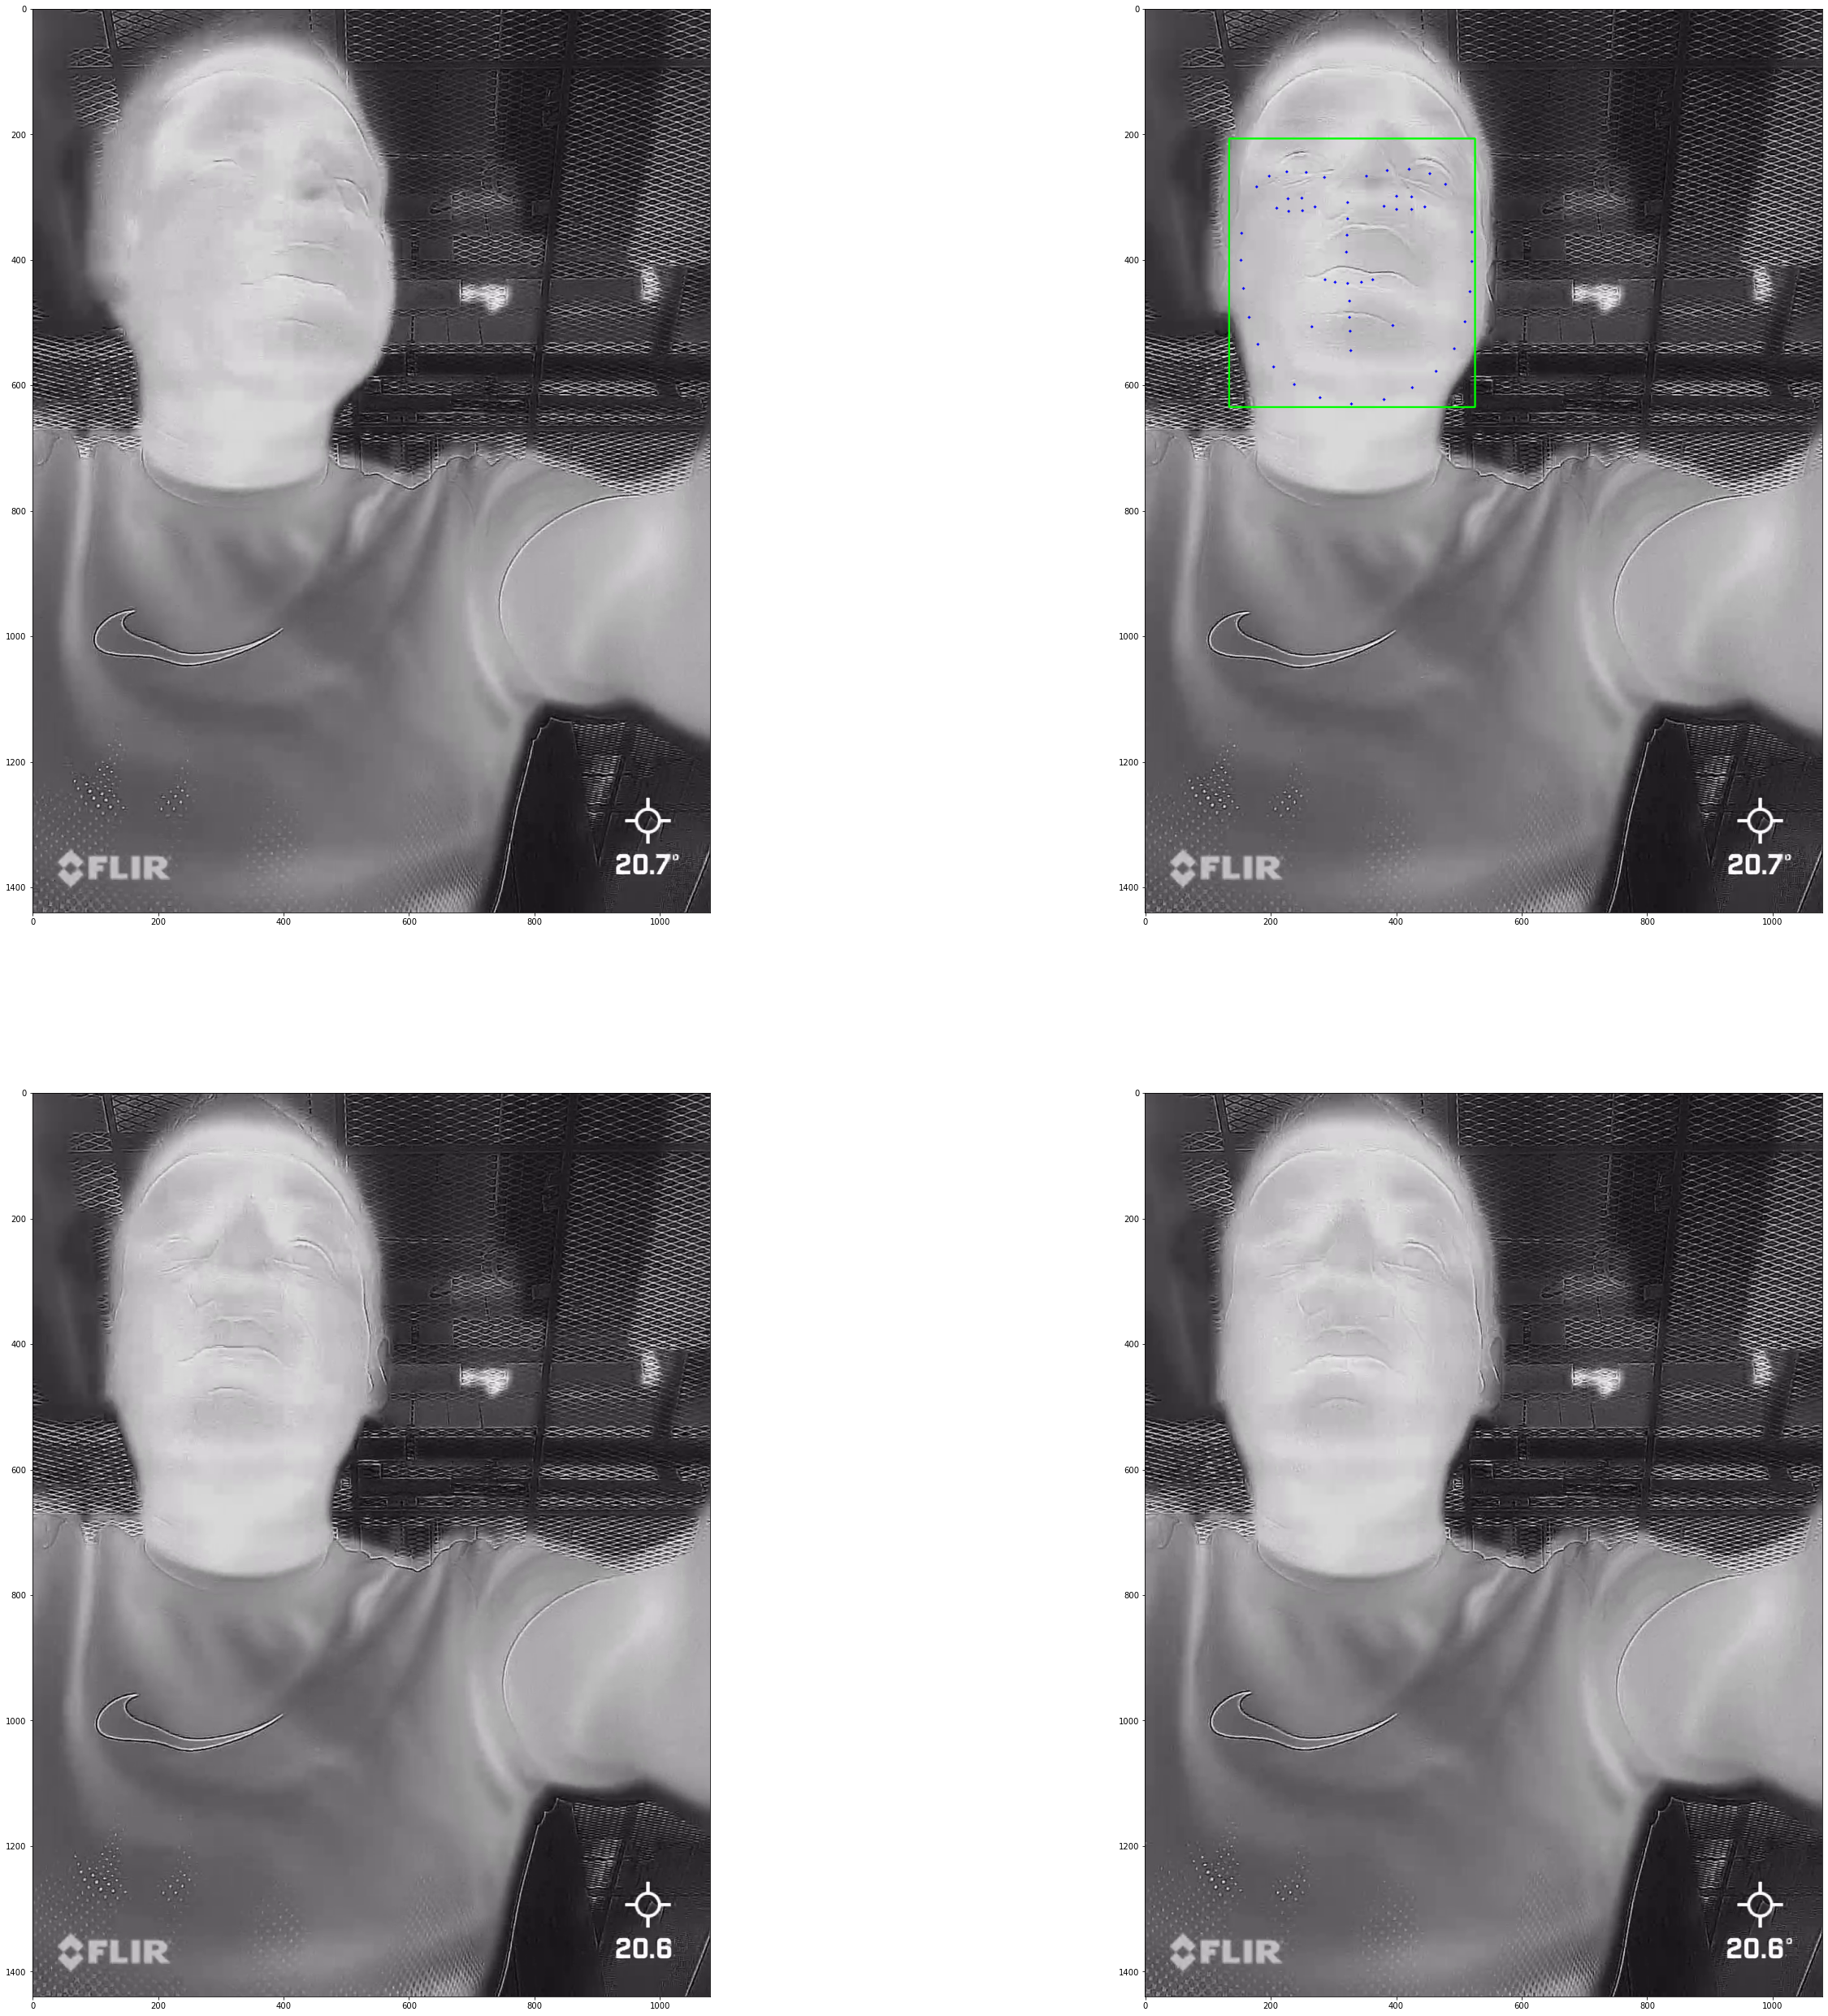

In [16]:
cap = cv2.VideoCapture(filenameWithPath)
# get the frame rate
fps = cap.get(cv2.CAP_PROP_FPS)

# get the total frame as per opencv2
print("Total number of frames = {}".format(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

# number of frame to fast forward. These many frames will be skipped.
# these number is close to the timestamp of interest where the event has occured.
fastForwardFrame = round(frameElapsed)-5;

fastForwardFrame = 50

#print(fastForwardFrame)

# keep a tab of the frame count
frameNumber = 0 if fastForwardFrame == 0 else fastForwardFrame


# move frame that we want to fast forward
while fastForwardFrame:
    correct,frame = cap.read()
    fastForwardFrame-=1;


NosFrame = 4
# this variable will be reduced after each frame is processed
frameLeft = NosFrame
fig, ax = plt.subplots(round(np.sqrt(NosFrame)),round(np.sqrt(NosFrame)), figsize=(45,45))

j=0;i=0
correct = True
while frameLeft and correct:
    
    # read the first frame of the video
    correct,frame = cap.read()
    
    # change the channels so that we are matplotlib ready
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    try:
        # detect faces in the image 
        rects = detector(frame, upsample_num_times=1)

        (x, y, w, h) = face_utils.rect_to_bb(rects[0])
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        shape = predictor(frame, rects[0])
        shape = face_utils.shape_to_np(shape)
        
        for (sx, sy) in shape:
            cv2.circle(frame, (sx, sy), 2, (0, 0, 255), -1)

        ax[j,i].imshow(frame)
    except Exception as e:
        print(e)
        ax[j,i].imshow(frame)
    i+=1;
    if i==round(np.sqrt(NosFrame)):
        i=0
        j+=1
    frameLeft-=1; frameNumber+=1

In [14]:
fastForwardFrame

0